## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Importing Data

In [2]:
df = pd.read_csv("global_terrorism_0718.csv", encoding = "latin1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape # (rows, columns)

(181691, 135)

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group_name','country_txt':'Country',
                   'region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'summary':'Summary','attacktype1_txt':'Attack_type','targtype1_txt':'Target_on','individual':'Individual',
                   'weaptype1_txt':'Weapon_type','nkill':'Kills','nwound':'Wounds'},inplace=True)

In [6]:
# importing only usefull columns
df = df[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'Latitude', 'Longitude', 'Attack_type', 
         'Target_on', 'Group_name', 'Individual', 'Weapon_type', 'Kills', 'Wounds']]

In [7]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Attack_type,Target_on,Group_name,Individual,Weapon_type,Kills,Wounds
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,0,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,0,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,0,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0,Incendiary,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_type  181691 non-null  object 
 10  Target_on    181691 non-null  object 
 11  Group_name   181691 non-null  object 
 12  Individual   181691 non-null  int64  
 13  Weapon_type  181691 non-null  object 
 14  Kills        171378 non-null  float64
 15  Wounds       165380 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 16.6+ MB


In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Latitude        4556
Longitude       4557
Attack_type        0
Target_on          0
Group_name         0
Individual         0
Weapon_type        0
Kills          10313
Wounds         16311
dtype: int64

#### There are lots of Null values in Wounds, Kills, Longitude, Latitude and in other columns.

In [10]:
# dropping Null values
df.drop(df[df["City"].isnull()].index , inplace = True)
df.drop(df[df["State"].isnull()].index, inplace = True)

In [11]:
# filling null values with 0
df["Kills"].fillna(0, inplace = True)
df["Wounds"].fillna(0 ,inplace = True)

In [12]:
# Adding a new columns Casualties = Kills + Wounds
df["Casualties"] = df["Kills"] + df["Wounds"]

## Visualizations and Observations

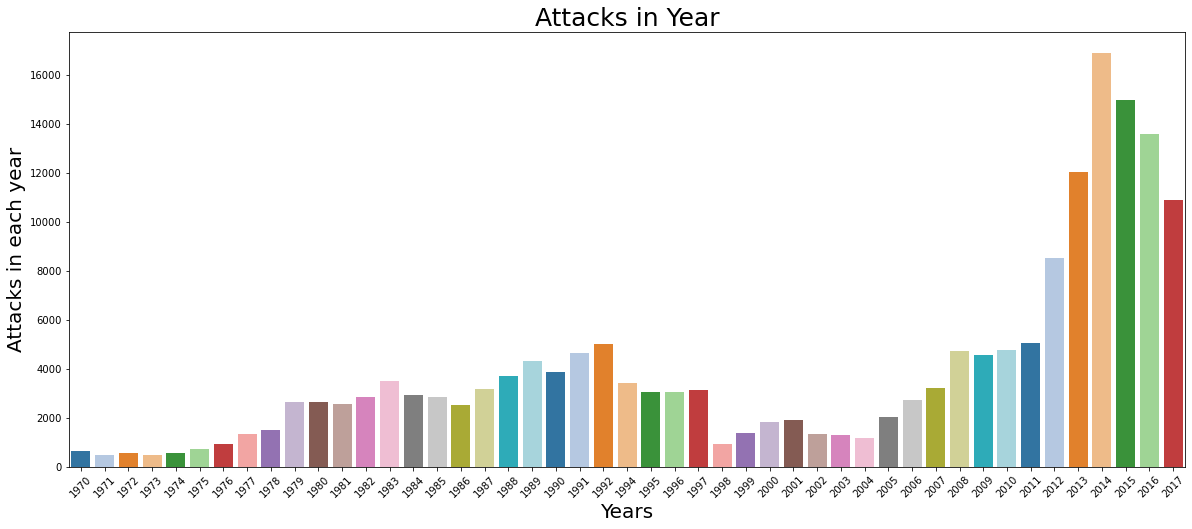

In [13]:
# Attacks in year
plt.figure(figsize= (20, 8))
sns.barplot(x = df["Year"].unique(), y = df["Year"].value_counts().sort_index(), palette= "tab20")
plt.xticks(rotation = 45)
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Attacks in each year", fontsize = 20)
plt.title("Attacks in Year", fontsize = 25)
plt.show()

### There is huge increase in terrorist attacks after 2011. Most of the attacks are in 2014.

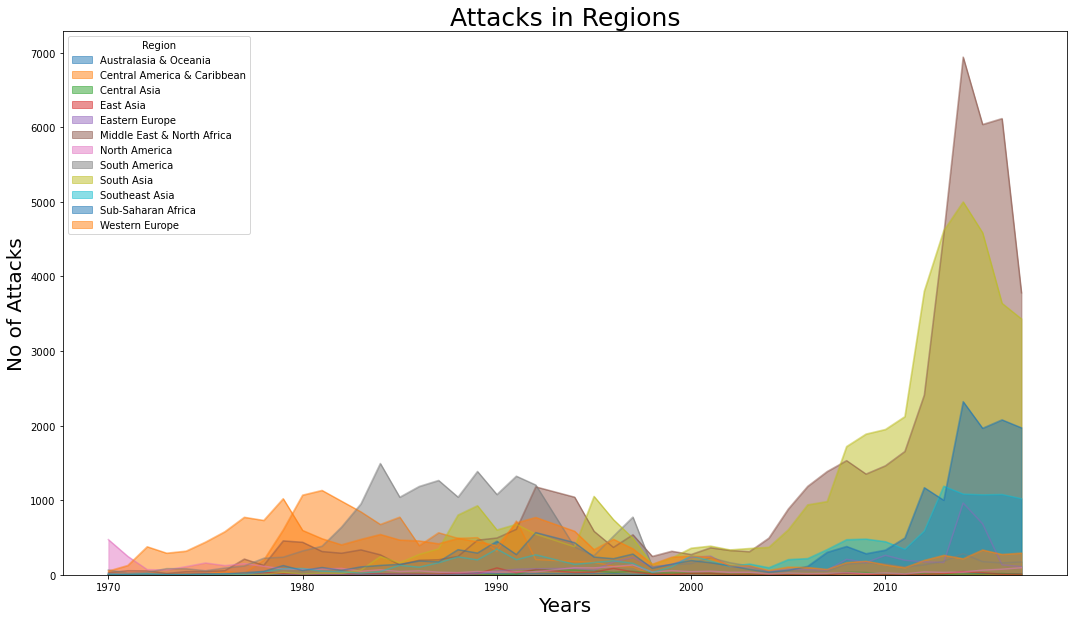

In [14]:
# Attacks in Region
pd.crosstab(df.Year, df.Region).plot(kind = "area", stacked = False, figsize=(18,10))
plt.xlabel("Years",fontsize = 20)
plt.ylabel("No of Attacks", fontsize = 20)
plt.title("Attacks in Regions", fontsize = 25)
plt.show()

### Most of attacks are made in Middle East & North Africa and South Asia Regions.

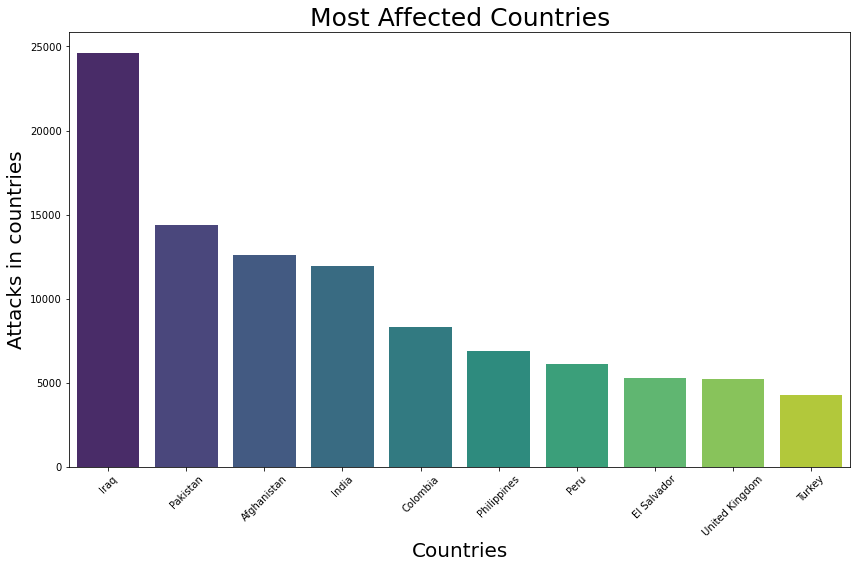

In [15]:
# Most affected countries
country_affect = df["Country"].value_counts()
plt.figure(figsize = (14,8))
sns.barplot(country_affect[:10].index, country_affect[:10].values, palette= "viridis")
plt.xticks(rotation = 45)
plt.xlabel("Countries", fontsize = 20)
plt.ylabel("Attacks in countries", fontsize = 20)
plt.title("Most Affected Countries", fontsize = 25)
plt.show()

### Iraq and Pakistan are the countries which are mostly affected by Terrorism and the terrorists.

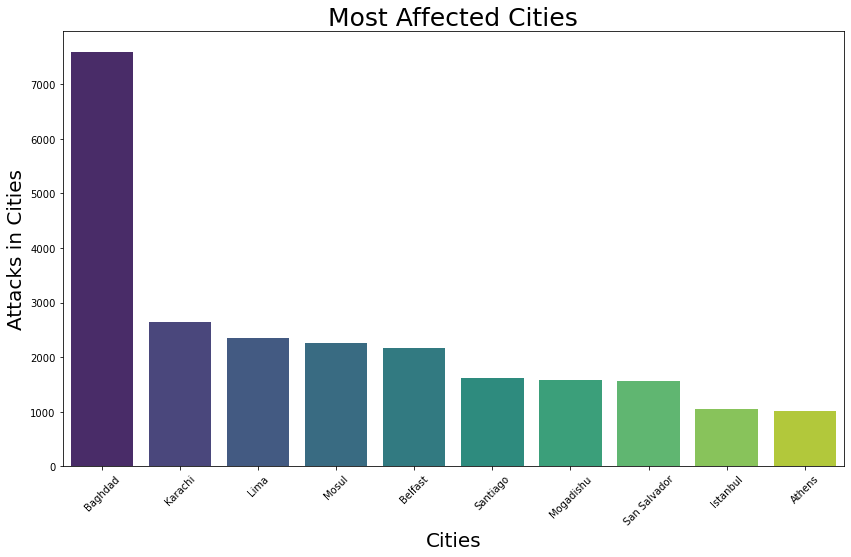

In [16]:
# Most affected cities
cities_affect = df["City"].value_counts()[1:11]
plt.figure(figsize = (14,8))
sns.barplot(cities_affect[:10].index, cities_affect[:10].values, palette= "viridis")
plt.xticks(rotation = 45)
plt.xlabel("Cities", fontsize = 20)
plt.ylabel("Attacks in Cities", fontsize = 20)
plt.title("Most Affected Cities", fontsize = 25)
plt.show()

### Bagdhdad which is the Capital of Iraq has suffered the highest by the terrorism and no other countries are not even close to them. 

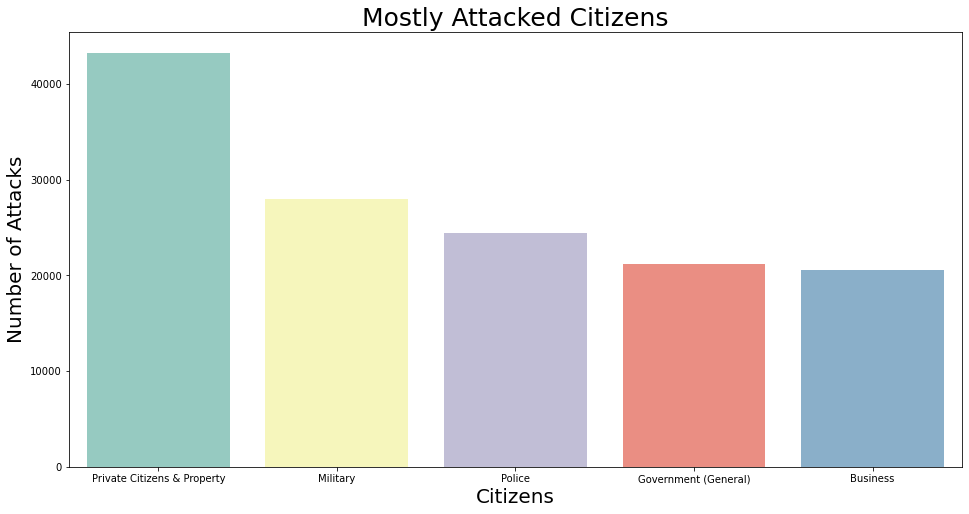

In [17]:
# mostly attacks on which citizens
targets =df["Target_on"].value_counts()
plt.figure(figsize =(16,8))
sns.barplot(targets[:5].index, targets[:5].values, palette= "Set3")
plt.xlabel("Citizens", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 20)
plt.title("Mostly Attacked Citizens", fontsize = 25)
plt.show()

### Terrorist mostly attacks on Private Citizens & Properties, Militaries , Police , Government General and Businessmens.

In [18]:
import re

# to extract group names
def group_optimize(x):
    if '(' in x:
        return re.findall('\(([A-Z]+)', x)[0]
    return x

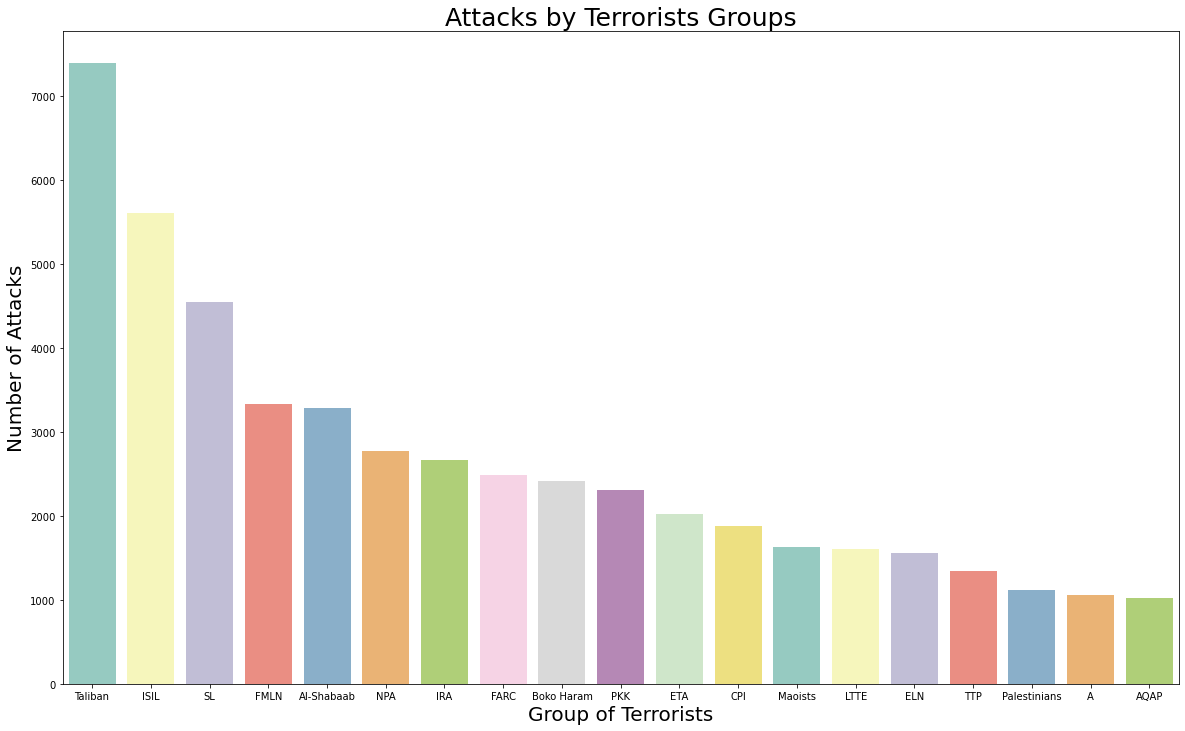

In [19]:
# group of terrorists
group_df =pd.DataFrame(df["Group_name"].value_counts()[1:20] ).reset_index()
group_df["index"] = group_df["index"].apply(group_optimize)
plt.figure(figsize = (20,12))
sns.barplot(group_df["index"], group_df["Group_name"] , palette= "Set3")
plt.xlabel("Group of Terrorists", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 20)
plt.title("Attacks by Terrorists Groups", fontsize = 25)
plt.show()

### Terrorist groups like Taliban , ISIL (Isalmic State of Iraq and Levant ) and SL(Shining Path) attacks most of time but not them other groups also has attacks most of the time like FMLN , AL-Shabaad, NPA and all others.
### All of them are threat to our societies.

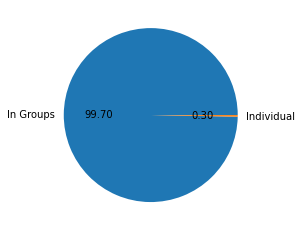

In [20]:
# attacks in groups or individual
plt.pie(df["Individual"].value_counts(), labels = ["In Groups", "Individual"], autopct= "%.2f" , )
plt.show()

### About 99% of the terrorism are from any of the groups and less then 1% attacks individually.

In [21]:
def attack_type_optimise(x):
    if x == "Hostage Taking (Kidnapping)" or x == "Hostage Taking (Barricade Incident)":
        return "Hostage Taking"
    if x == "Facility/Infrastructure Attack":
        return "Infrastructural Attack"
    return x

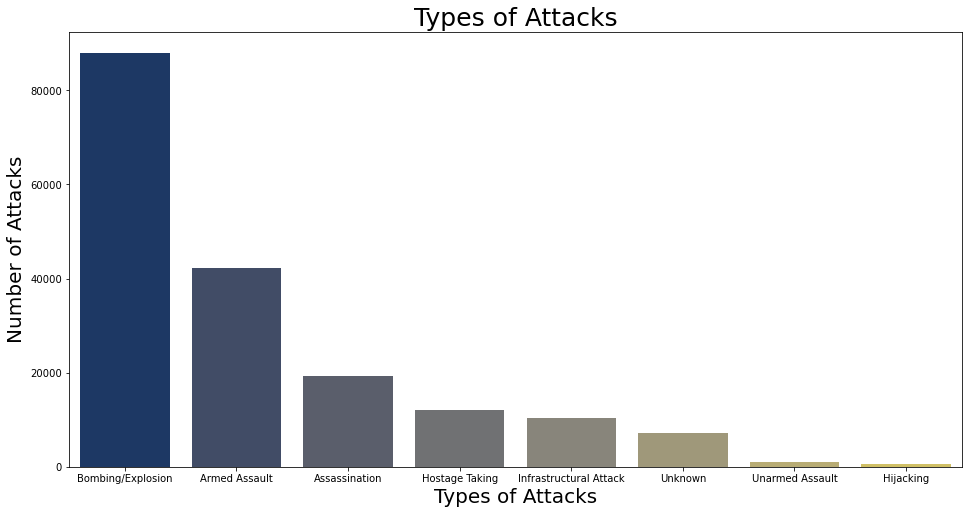

In [22]:
df["Attack_type"] = df["Attack_type"].apply(attack_type_optimise)

# 
attack_types = df["Attack_type"].value_counts()

plt.figure(figsize = (16,8))
sns.barplot(attack_types.index, attack_types.values, palette = "cividis")
plt.xlabel("Types of Attacks", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 20)
plt.title("Types of Attacks", fontsize = 25)
plt.show()

### Most of the time terrosists do Bombing or Explosion and Armed Assault .

In [23]:
df["Weapon_type"] = df["Weapon_type"].apply(lambda x: "vehicle" if "vehicle" in x else x)

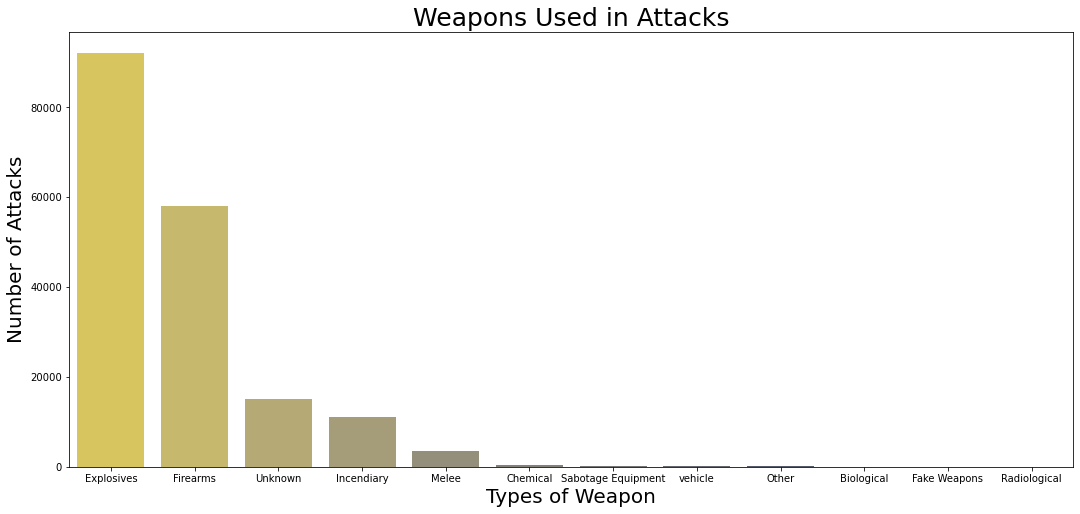

In [24]:
# types of weapon
weapon_type = df["Weapon_type"].value_counts()
plt.figure(figsize = (18,8))
sns.barplot(weapon_type.index, weapon_type.values, palette = "cividis_r")
plt.xlabel("Types of Weapon", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 20)
plt.title("Weapons Used in Attacks", fontsize = 25)
plt.show()

### Mostly the uses Explosive Materials and Firearms in the attacks.

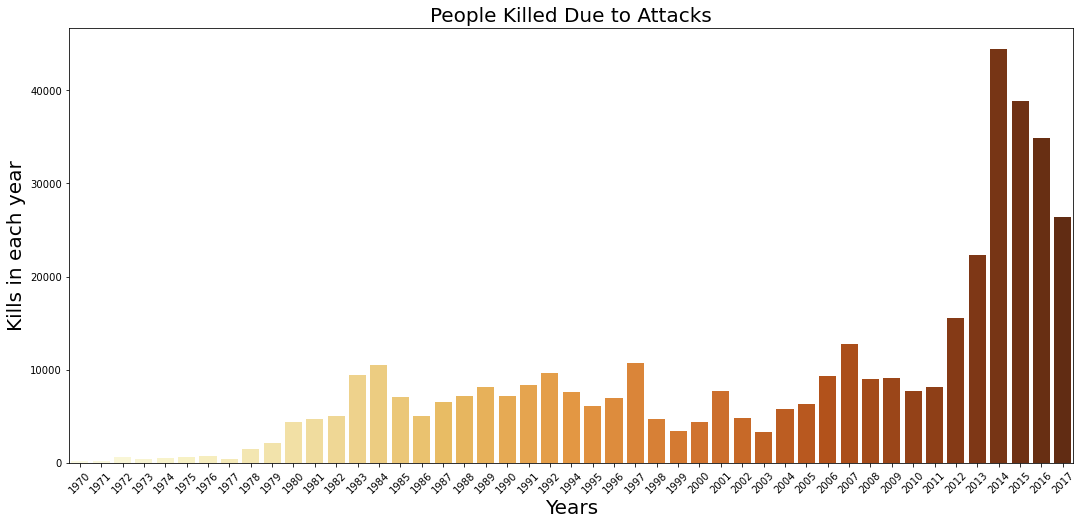

In [25]:
# people kills every year
yearly_kill = df[["Year","Kills"]].groupby(by = "Year")["Kills"].sum()
plt.figure(figsize=(18,8))
sns.barplot(x = yearly_kill.index, y = yearly_kill.values, palette= "YlOrBr")
plt.xticks(rotation = 45)
plt.xlabel("Years",fontsize = 20)
plt.ylabel("Kills in each year",fontsize = 20)
plt.title("People Killed Due to Attacks", fontsize = 20)
plt.show()

### There are so many peoples killed due the attacks. As attacks increases after 2011 , more people are died after 2011.

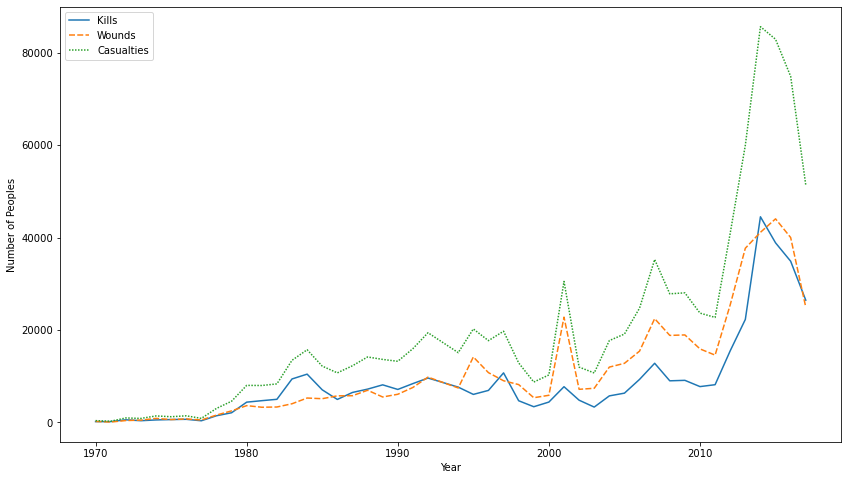

In [26]:
yearly_casualties = df[["Year","Kills","Wounds","Casualties"]].groupby(by = "Year").sum()

plt.figure(figsize = (14,8))
sns.lineplot(data = yearly_casualties)
plt.ylabel("Number of Peoples")
plt.show()

### There are more number of people which are saved but there are still large number of people who have been killed or died in the attacks. And sometimes there are more kills then saved ones.